# Classification

## Data Preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all columns read correctly
- Check if the churn variable needs any preparation

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Enable viewing all columns regardless how many
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
# load the dataset
dataset = pd.read_csv("Telco-Customer-Churn.csv")
df = pd.DataFrame(dataset)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# make all column names and values uniform in lowercase letters and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [5]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [6]:
# the totalcharges column contains numerical values but there are some features that makes it seem to have objects.
# when we try to convert those values to numericals they raise an error, that error is overriden by use of "coerce" 
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
# converting the totalcharges column to numeric values
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
# filling the null values in totalcharges column with zeros
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
# check the churn variable
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [10]:
# churn values are categorical (yes, no), convert them to numericals
df.churn = (df.churn == "yes").astype(int)

## Setting up the Validation Framework

In [11]:
# import train_test_split algorithm
from sklearn.model_selection import train_test_split

In [12]:
# spit the dataset into full train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
# check the lengths of both full_train and test sets
len(df_full_train), len(df_test)

(5634, 1409)

In [14]:
# now split full_train into train and validation sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
# check the lengths of train, validation and test sets
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
# reset index of all datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
# create target variables from all datasets
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
# delete the target variable from all sets so that it is not accidentally used as X variable
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## EDA

- Check missing values
- Look at the targe variable(churn)
- Look at numerical and categorical variables

In [19]:
# reset index
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
# check for null values in the dataset
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
# check for churn values
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [22]:
# check for churn rate
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

The <b> Churn Rate</b> is 0.269968

In [23]:
# global churn rate using mean()
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

Calculating the mean also gives the churn rate because it calculates the average of <b>ones</b> using n as the number of those ones.

In [24]:
# extract numerical features
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [25]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [26]:
# extract categorical features
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [27]:
# check for the number of unique values per each categorical feature
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn Rate and Risk Ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable
 - Churn rate
 - Risk ratio
 - Mutual Information - later

#### Churn rate

In [28]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [29]:
# churn rate based on the female gender group
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()
churn_female

0.27682403433476394

In [30]:
# churn rate based on the male gender group
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

0.2632135306553911

In [31]:
# global churn rate
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [32]:
# churn rate based on those who have partners
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner

0.20503330866025166

In [33]:
# churn rate based on those who don't have partners
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner

0.3298090040927694

In [34]:
# risk ratio based on those who don't have partners
churn_no_partner / global_churn

1.2216593879412643

In [35]:
# risk ratio based on those who have partners
churn_partner / global_churn

0.7594724924338315

In [36]:
# display library to show function called inside a for loop
from IPython.display import display

In [37]:
# churn rate and risk ration based on all possible groups in the dataset
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn
    df_group["risk"] = df_group["mean"] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Features with risk ratio more than one show those who are more likely to churn while those whose risk ratio is almost zero are less likely to churn

## Feature Importance: Mutual Inforamtion

Mutual information helps calculate feature importance for categorical values with relation to the target variable <b>churn</b>

In [38]:
# import mutual_info_score library for checking mutual information and score of different features
from sklearn.metrics import mutual_info_score

In [39]:
# trying to check for the mutual info score of contract with churn
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [40]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [41]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [42]:
# creating a function to apply mutual info score to other features with relation to churn
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [43]:
# using apply() method to use mutual_info_score for churn and all other categorical features
# sort the results in descending order to show the most important first.
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation

<b> Correlation</b> calculates feature importance for numerical variables with relation to the target variablle <b>churn</b>

In [44]:
# all numerical variables
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [45]:
# check for correlation of those variables with target variable
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [46]:
# check for the order of importance
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In the correlation results above, <b>tenure</b> and <b>totalcharges</b> are negative meaning that the more they grow the less likely a customer is going to churn. <b>monthlycharges</b> are positive meaning that the more they grow, the more a customer is going to churn.

In [47]:
# churn rate when tenure is less than 2 months
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [48]:
# churn rate when tenure is more than 2 months
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [49]:
# churn rate when tenure is between 2 months and 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [50]:
# churn rate when tenure is more than 12 months
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [51]:
# churn rate when monthly charges are less than 20 dollars
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [52]:
# churn rate when monthlycharges are between 20 dollars and 50 dollars
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [53]:
# churn rate when monthlycharges are more than 50 dollars
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## One-hot Encoding

Use <b>Scickit learn </b>

In [54]:
# import DictVectorizer to use for one-hot encoding
from sklearn.feature_extraction import DictVectorizer

In [55]:
# convert all rows in train set to dictionary
train_dicts = df_train[categorical + numerical].to_dict(orient="records")

In [56]:
# Set sparse to False in DictVectorizer
dv = DictVectorizer(sparse=False)

In [57]:
# fit and transform train set
X_train = dv.fit_transform(train_dicts)
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [58]:
# create validation dictionary
val_dicts = df_val[categorical + numerical].to_dict(orient="records")

In [59]:
# transform validation set
X_val = dv.transform(val_dicts)
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

## Logistic Regression

- Binary Classification
- Linear Regression vs Logistic Regression

In [60]:
# logistic regression uses a sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [61]:
# create z to be used to demonstrate the sigmoid function
z = np.linspace(-7, 7, 51)

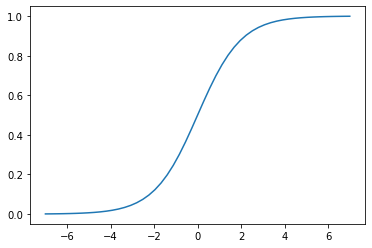

In [62]:
# demonstrating the sigmoid function
plt.plot(z, sigmoid(z))

In [63]:
# linear regression function
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [64]:
# logistic regression function
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## Training Logistic Regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [65]:
# import the logistic regression algorithm from sklearn's linear_model
from sklearn.linear_model import LogisticRegression

In [66]:
# create a model and fit train data to the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# check the bias term (w0)
model.intercept_[0]

-0.1091398321008328

In [68]:
# check for other weights(w)
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [69]:
# prediction probability
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00903181, 0.20424359, 0.21185789, ..., 0.13654225, 0.79969517,
       0.83733898])

In [70]:
# set churn to be values >= 0.5
churn_decision = (y_pred >= 0.5)

In [71]:
# check for churn decisions
churn_decision

array([False, False, False, ..., False,  True,  True])

In [72]:
# check churn decisions in the validation sets
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [73]:
# churn decision accuracy
(y_val == churn_decision).mean()

0.8034066713981547

In [74]:
# create a prediction dataframe with (probability, prediction and actual) features
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val

In [75]:
# Add another feature to check predictions that are correct and those that are not correct
df_pred["correct"] = df_pred.prediction == df_pred.actual

In [76]:
# load the prediction dataframe
df_pred

,probability,prediction,actual,correct
0,0.009032,0,0,True
1,0.204244,0,0,True
2,0.211858,0,0,True
3,0.542893,1,1,True
4,0.213421,0,0,True
...,...,...,...,...
1404,0.314409,0,0,True
1405,0.039478,0,1,False
1406,0.136542,0,0,True
1407,0.799695,1,1,True


In [77]:
# check for prediction accuracy
df_pred.correct.mean()

0.8034066713981547

In [78]:
# predictions in numerical type
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

# Evaluation

## Accuracy and Dummy model

- Evaluate the model on different thresholds
- Check the accuracy of the dummy baselines

In [89]:
# All customers in target validation set
len(y_val)

1409

In [90]:
# Total number of those whose predictions are right
(y_val == churn_decision).sum()

1132

In [91]:
# The percentage of those whose predictions are right
(y_val == churn_decision).mean()

0.8034066713981547

In [92]:
# Can also be calculated by dividing the total correct predictions by total number of customers
1132/1409

0.8034066713981547

In [93]:
# import accuracy_score
from sklearn.metrics import accuracy_score

In [94]:
# use accuracy score to calculate for percentage of correct predictions
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [95]:
# set different thresholds between 0 to 1, 21 in total and use them to see the accuracies when they each of them are used
# differently
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print("%.2f %.3f" % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.794
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


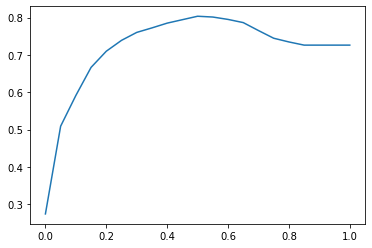

In [96]:
# figure to visualize different accuracies based on different thresholds
plt.plot(thresholds, scores)

In [97]:
# import Counter
from collections import Counter

In [98]:
# Use counter to calculate the number of all False for y_pred >= 1.0
Counter(y_pred >= 1.0)

Counter({False: 1409})